# Converting Code to a Local Function

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

In [2]:
golds = pd.read_excel("./data/medals.xlsx", sheet_name='golds', header=None)
medals = pd.read_excel("./data/medals.xlsx", sheet_name='medals', header=None)

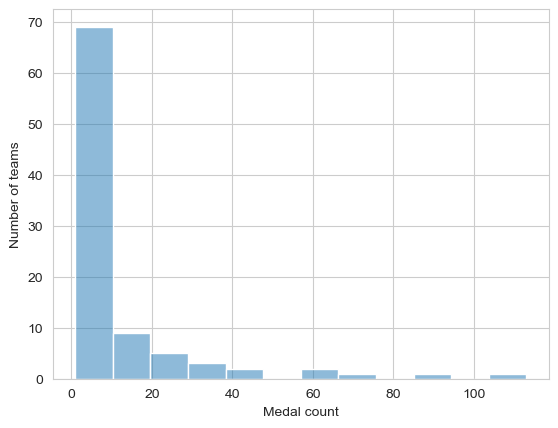

In [3]:
plt.figure()
sns.histplot(medals, bins=12, legend=False)
plt.xlabel("Medal count")
plt.ylabel("Number of teams")
plt.show()

The data file contains counts for the total medals won by each country, plus counts for gold, silver, and bronze medals individually.

In [4]:
def paretoperc(x):
    # Cumulative contribution of data points (in order)
    cc = x.sort_values(by=0, ignore_index=True, ascending=False).cumsum()
    cc = 100 * cc / cc.iloc[-1]                # Normalize to percentage
    # Corresponding percentiles (column vector to match cc)
    pct = np.arange(1, x.size+1)
    pct = 100 * pct / pct.size           # Normalize to percentage
    # Find the number of data values needed so that P% of the data is in (100-P)% of the values
    idx = np.where(cc.to_numpy().squeeze() >= (100 - pct))[0][0]
    pp = cc.iloc[idx][0]

    return pp

In [5]:
pp = paretoperc(medals)
pp

75.64814814814815

In [6]:
ppgold = paretoperc(golds)
ppgold

73.82352941176471